In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject\\data\\first_practice_dataframe.xlsx", sheet_name="Sheet1")
df = pd.DataFrame(data.cat5_customerSatisfaction, data.cat4_income)
# print(data.head(3))
#print(data.info())
new = pd.DataFrame(data["cat10_proficiencyLevel"])
new["cat9_age"] = data["cat9_age"]
new["c"] = data["num1_24"]
new["num2_24"] = data["num2_24"]
new["num3_24"] = data["num3_24"]
print(new)

    cat10_proficiencyLevel            cat9_age            c      num2_24  \
0                 Advanced      below 21 years   907.348256   242.734013   
1                   Novice  59 years and above   962.219776  1035.400665   
2                   Novice  59 years and above  1053.680910  -469.064161   
3                 Advanced  59 years and above  1148.702980  2793.294228   
4                 Advanced  59 years and above  1018.119147  -954.043533   
..                     ...                 ...          ...          ...   
995               Advanced      below 21 years   815.379375  -154.418945   
996                 novice  59 years and above  1195.478914  -572.061291   
997                 Novice      21 to 35 years   762.115010  -596.334731   
998                 Novice  59 years and above   730.372126 -1101.408593   
999               Advanced      36 to 58 years  1015.521911   838.290002   

        num3_24  
0    971.167308  
1    933.449443  
2    950.209325  
3    942.957073

Text(0.5, 1.0, '2')

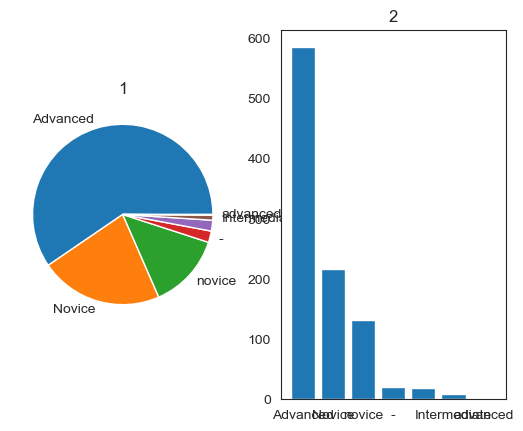

In [60]:
fig, axs = plt.subplots(1, 2)
proficiency = data["cat10_proficiencyLevel"].value_counts()
axs[0].pie(proficiency.values, labels=proficiency.index)
axs[0].set_title("1")
axs[1].bar(x=proficiency.index, height=proficiency.values)
axs[1].set_title("2")

{'whiskers': [<matplotlib.lines.Line2D at 0x29160ee72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29160ee77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29160ee6fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x29160ee7d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x29160ee7fd0>],
 'means': []}

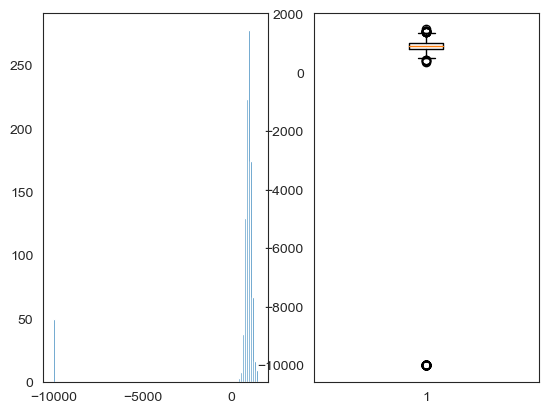

In [61]:
num1 = data["num1_24"]
n_bins = len(num1)
fig2, axs2 = plt.subplots(1, 2)
axs2[0].hist(num1, bins=100)
axs2[1].boxplot(x=num1)

C:\Users\fongr\AppData\Local\Temp\ipykernel_8872\4118005870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num1, color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


<AxesSubplot: xlabel='num1_24', ylabel='Density'>

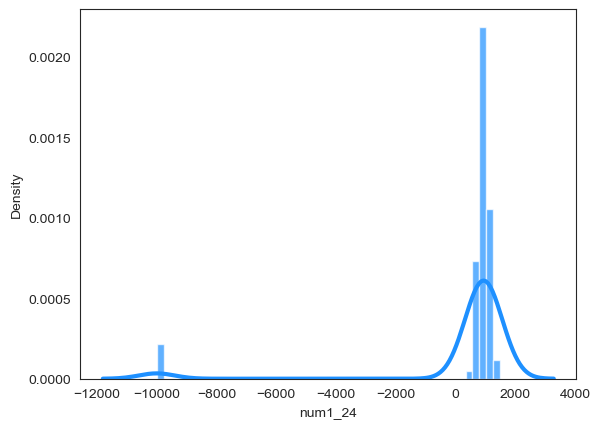

In [62]:
import seaborn as sns
sns.set_style("white")
sns.distplot(num1, color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

C:\Users\fongr\AppData\Local\Temp\ipykernel_8872\4041694735.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c, color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})


<AxesSubplot: ylabel='Density'>

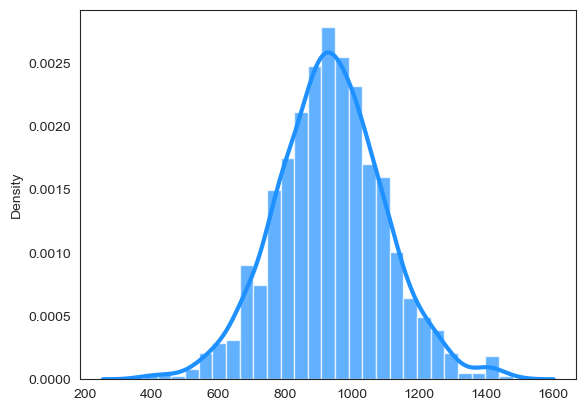

In [63]:
from scipy.stats import sigmaclip
c, low, upp = sigmaclip(num1, 4, 4)
sns.distplot(c, color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

In [71]:
def outlier_estimation(value):
    column = num1
    #me = column.median()
    #mo = column.mode().tolist()[0]
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    delta = q75 - q25
    inside_border = [(q25 - 1.5 * delta), (q75 + 1.5 * delta)]
    outside_border = [(q25 - 3 * delta), (q75 + 3 * delta)]
    print(inside_border, outside_border)
    if value > outside_border[1] or value < outside_border[0]:
        return 2
    elif value > inside_border[1] or value < inside_border[0]:
        return 1
    else:
        return 0

In [75]:
print(outlier_estimation(1000))

[475.5910411798852, 1359.3977338215284] [144.16353143926904, 1690.8252435621446]
0


In [65]:
import sklearn